In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

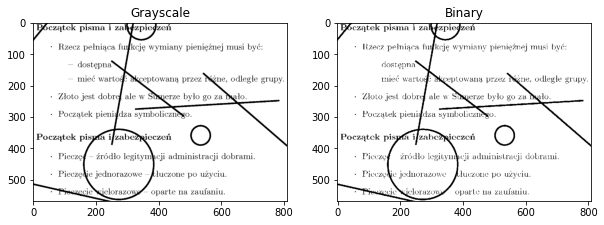

In [2]:
img = cv.imread("text_no_ocr.png", cv.IMREAD_GRAYSCALE)
_, img_bin = cv.threshold(img, 100, 255, cv.THRESH_BINARY)

plt.figure(figsize=[10,10])
plt.subplot(121) 
plt.imshow(img, cmap='gray')
plt.title("Grayscale")
plt.subplot(122)
plt.imshow(img_bin, cmap='gray')
plt.title("Binary");

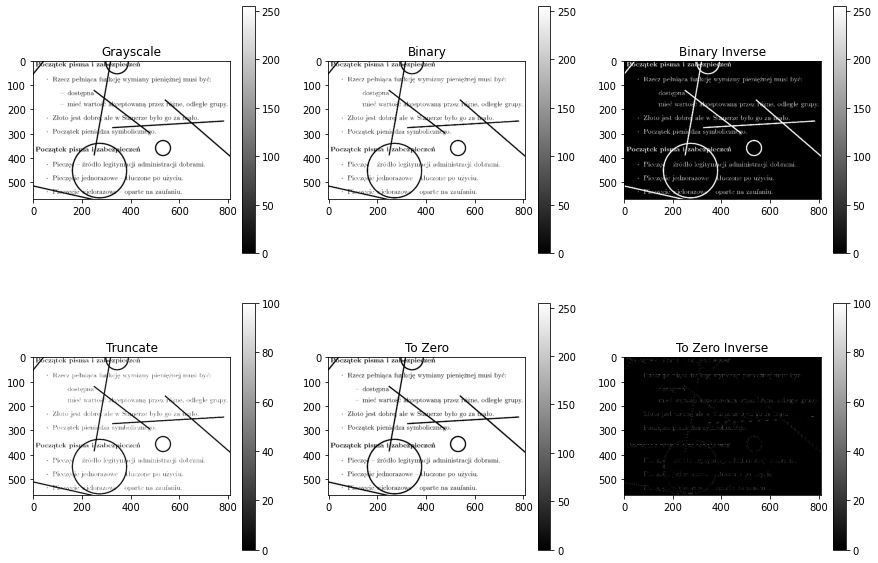

In [3]:
_, img_bin = cv.threshold(img, 100, 255, cv.THRESH_BINARY)
_, img_bin_inv = cv.threshold(img, 100, 255, cv.THRESH_BINARY_INV)
_, img_trunc = cv.threshold(img, 100, 255, cv.THRESH_TRUNC)
_, img_to_zero = cv.threshold(img, 100, 255, cv.THRESH_TOZERO)
_, img_to_zero_inv = cv.threshold(img, 100, 255, cv.THRESH_TOZERO_INV)

images = (img, img_bin, img_bin_inv, img_trunc, img_to_zero, img_to_zero_inv)
titles = ("Grayscale", "Binary", "Binary Inverse", "Truncate", "To Zero", "To Zero Inverse")

plt.figure(figsize=[15,10])

for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(231+i)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.colorbar()

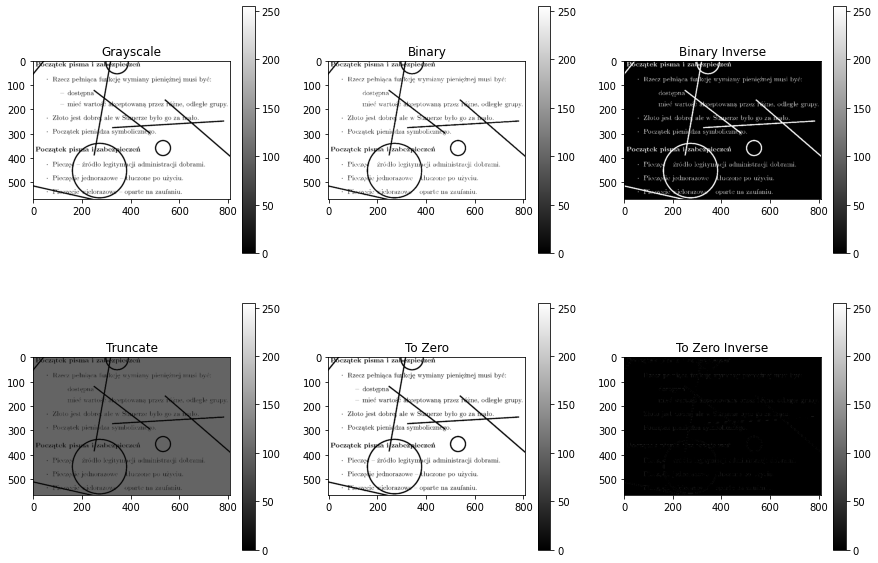

In [4]:
plt.figure(figsize=[15,10])

for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(231+i)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.colorbar()

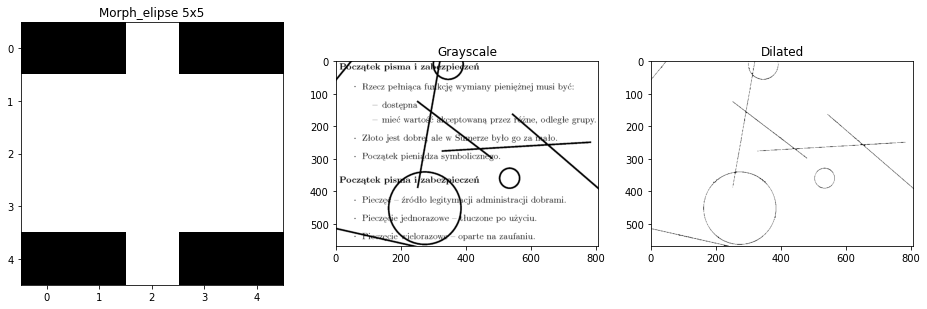

In [64]:
kernel_ellipse = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

coins = cv.imread("text_no_ocr.png", cv.IMREAD_GRAYSCALE)
_, coins_bin = cv.threshold(coins, 125, 255, cv.THRESH_BINARY)

coins_dilated = cv.dilate(coins_bin, kernel_ellipse, iterations=1)

plt.figure(figsize=[16,16])
plt.subplot(131)
plt.title("Morph_elipse 5x5")
plt.imshow(kernel_ellipse, cmap='gray');
plt.subplot(132)
plt.imshow(coins, cmap='gray')
plt.title("Grayscale")
plt.subplot(133)
plt.imshow(coins_dilated, cmap='gray')
plt.title("Dilated");

Text(0.5, 1.0, 'Grayscale')

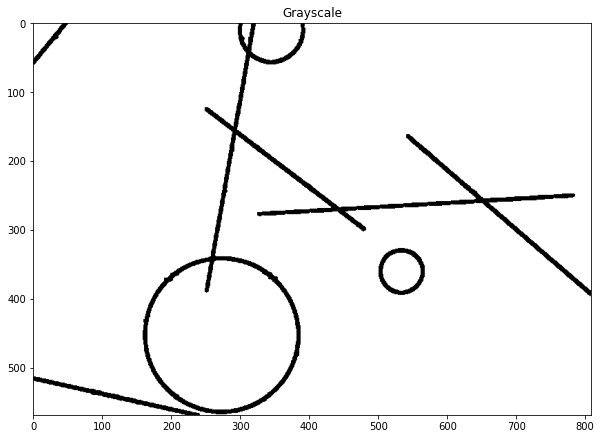

In [57]:
kernel_ellipse = cv.getStructuringElement(cv.MORPH_ELLIPSE, (6, 6))
coins_eroded = cv.erode(coins_dilated, kernel_ellipse, iterations=1)

plt.figure(figsize=[10,8])
plt.imshow(coins_eroded, cmap='gray')
plt.title("Grayscale")

Text(0.5, 1.0, 'Grayscale')

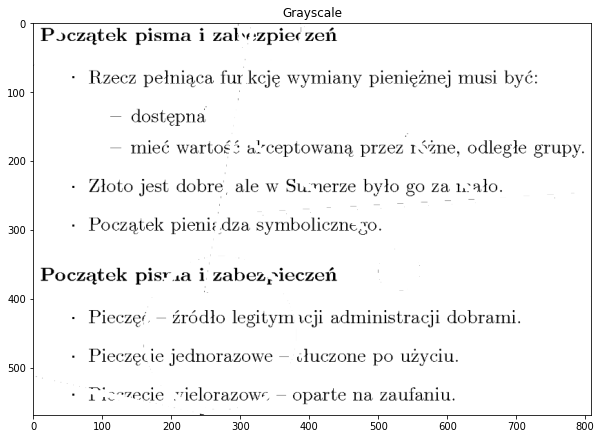

In [66]:
coins[coins_eroded == 0] = 255
plt.figure(figsize=[10,8])
plt.imshow(coins, cmap='gray')
plt.title("Grayscale")